<a href="https://colab.research.google.com/github/Ana138/data_mining_aplicada/blob/main/Construindo_Redes_Neurais_Convolucionais_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação

In [3]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Classificando meus dados

In [6]:
# Importando o dataset
from tensorflow.keras.datasets import cifar10

In [7]:
# Carrecango o dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [8]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [9]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [10]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [11]:
y_train.max(), y_train.min()

(9, 0)

In [12]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [13]:
# Normalizando minhas imagens
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [15]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

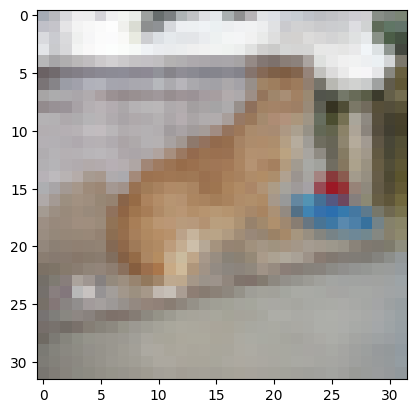

In [47]:
plt.imshow(x_train[1030])

In [48]:
y_train[1030]

array([3], dtype=uint8)

In [18]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

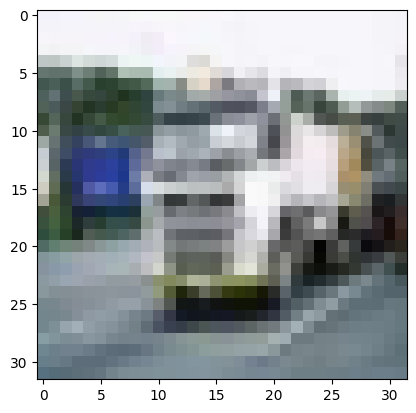

In [19]:
plt.imshow(x_train[1000])

In [20]:
y_train[1000]

array([9], dtype=uint8)

# Construindo CNN

In [21]:
# Definindo meus objetos
model = tf.keras.models.Sequential()


In [22]:
# Add first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [32, 32, 3]))

In [23]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [24]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [25]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [26]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [27]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [28]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [29]:
# Adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Treinando meu modelo

In [31]:
# Compilando o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


In [32]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 362s 72ms/step - loss: 1.4360 - sparse_categorical_accuracy: 0.4778
Epoch 2/10
5000/5000 [==============================] - 358s 72ms/step - loss: 1.0251 - sparse_categorical_accuracy: 0.6361
Epoch 3/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.8836 - sparse_categorical_accuracy: 0.6898
Epoch 4/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.7880 - sparse_categorical_accuracy: 0.7233
Epoch 5/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.7229 - sparse_categorical_accuracy: 0.7450
Epoch 6/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.6674 - sparse_categorical_accuracy: 0.7661
Epoch 7/10
5000/5000 [==============================] - 360s 72ms/step - loss: 0.6242 - sparse_categorical_accuracy: 0.7807
Epoch 8/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.5861 - sparse_categorical_accuracy: 0.7933
Epoch 9/

# Avaliando a previsão do modelo

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 32s 100ms/step - loss: 0.7375 - sparse_categorical_accuracy: 0.7547


In [34]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.7547000050544739


In [35]:
y_pred=model.predict(x_test)

313/313 [==============================] - 15s 49ms/step


In [36]:
y_pred[2]

array([0.286542  , 0.0548651 , 0.00796035, 0.10001905, 0.02865198,
       0.00631562, 0.01068039, 0.00950819, 0.39629695, 0.09916042],
      dtype=float32)

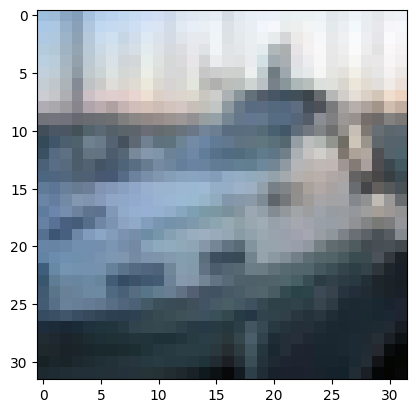

In [37]:
plt.imshow(x_test[2])

In [49]:
y_pred=[np.argmax(y) for y in y_pred]

In [50]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[778  17  38  19  24   4  14   8  51  47]
 [ 10 896   0   8   2   3   7   4   7  63]
 [ 54   3 552  67 120  68 102  19   8   7]
 [ 23  17  31 541  96 172  71  24   7  18]
 [ 13   5  21  33 810  26  51  32   7   2]
 [ 11   7  27 150  71 655  30  34   2  13]
 [  9   6  13  40  53  17 855   2   5   0]
 [  7   4  18  36  90  65   9 751   2  18]
 [ 55  37   7  12   7   5   6   1 840  30]
 [ 17  72   2   9   4   7   5   2  13 869]]


In [51]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.7547


In [52]:
model.save("atividade_final.h5")